In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv', index_col = 'ID')
df.head(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.tail(5)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,3,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 1 to 129880
Data columns (total 23 columns):
Gender                                    129880 non-null object
Age                                       129880 non-null int64
Customer Type                             129880 non-null object
Type of Travel                            129880 non-null object
Class                                     129880 non-null object
Flight Distance                           129880 non-null int64
Departure Delay                           129880 non-null int64
Arrival Delay                             129487 non-null float64
Departure and Arrival Time Convenience    129880 non-null int64
Ease of Online Booking                    129880 non-null int64
Check-in Service                          129880 non-null int64
Online Boarding                           129880 non-null int64
Gate Location                             129880 non-null int64
On-board Service                          129880 no

In [5]:
df.isna().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

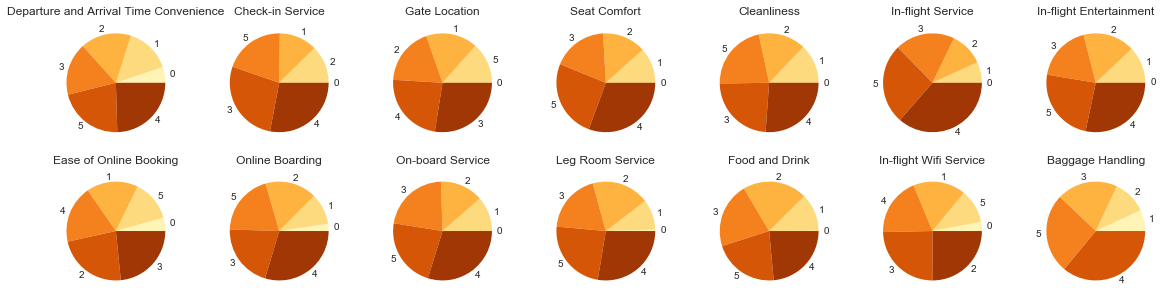

In [6]:
plt.style.use('seaborn')
fig, ax = plt.subplots(2,7,figsize = (20,5))
i, j = 0, 0
for col in df.iloc[:,8:22] :
#     print(df[col].value_counts().sort_index())
    data = df[col].value_counts().sort_values()
    lebels = data.index
    ax[i,j].pie(data.values, labels = lebels,colors =sns.color_palette("YlOrBr"))
    ax[i,j].set_title(col)
    i += 1
    if i == 2:
        i = 0
        j+=1
plt.show()

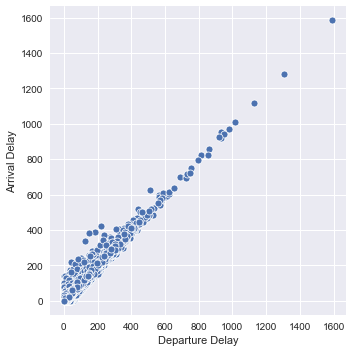

In [7]:
sns.relplot(x = 'Departure Delay', y = 'Arrival Delay' , data = df, kind = 'scatter')
plt.show()